In [28]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


def swap(x): ## consider swapping neighboring cities, not two random cities
    
    n = len(x)
    i  = random.sample(range(0, n), 1)[0]
    if i == 0:
        j = 1
    elif i == n - 1:
        j = n- 2
    else:
        j = i + 1

    y = np.copy(x)
    y[[i, j]] = y[[j, i]]

    return y

def inverse_swap(x):
    
    n = len(x)
    y = np.copy(x)
    i = random.sample(range(0, n - 2), 1)[0]
    j = random.sample(range(i + 1, n), 1)[0]

    y[i:j] = np.flip(x[i:j], axis = 0)

    return y

def distance(x):
    distances = np.zeros(len(x))
    for i in range(len(x) - 1):
        distances[i] = np.linalg.norm(x[i+1] - x[i])
    distances[-1] = np.linalg.norm(x[0] - x[-1]) ## must return to starting position

    return np.sum(distances)

def acceptance_probability(E_new, E_old, Temp):
    if E_new <= E_old:
        prob = 1
    else:
        prob = np.exp(-(E_new - E_old) / Temp)
        
    return min(1, prob)

def New_Temp(Temp, a = .95):
    return Temp*a

def New_iterations(iterations, b = 1.05):
    x = iterations * b
    
    return math.ceil(x)

def min_configuration(max_stages = 30, iterations = 1, Temp = 10, x = None): # 75 works well for max stages, 5 iterations works 

    total_distance_traveled = np.array([])

    x_old = x 
    for i in range(max_stages):
        for j in range(iterations): 
            E_old = distance(x_old)
            x_new1 = swap(x_old)
            E_new1 = distance(x_new1)
            x_new2 = inverse_swap(x_old)
            E_new2 = distance(x_new2)
            if E_new1 <= E_new2:
                E_new = E_new1
                x_new = x_new1
            else:
                E_new = E_new2
                x_new = x_new2
            accept_prob = acceptance_probability(E_new = E_new, E_old = E_old, Temp = Temp)
            if np.random.uniform() <= accept_prob:
                x_old = x_new
            else:
                x_old = x_old
        Temp = New_Temp(Temp = Temp, a = .95)
        iterations = New_iterations(iterations = iterations, b = 1.05)
        distance_x = distance(x_old)
        total_distance_traveled = np.append(total_distance_traveled, distance_x)

        #if i % 10 == 0:

            #print('Temperature: ', Temp, 'Iteration: ', i, 'Distance to Travel: ', distance_x)

    return x_old, total_distance_traveled


def graph_config(x):

    x = np.concatenate((x, np.array([x[0]])), axis = 0)
    x_1, x_2 = x[:, 0], x[:, 1]
    plt.title("Final Configuration")
    plt.scatter(x_1, x_2)
    plt.plot(x_1, x_2)
    plt.show()

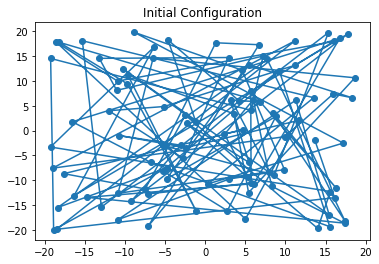

In [29]:
x = np.random.uniform(low = -20, high = 20, size = 200).reshape(-1, 2)
plt.plot(x[:, 0], x[:, 1])
plt.scatter(x[:, 0], x[:, 1])
plt.title('Initial Configuration')
plt.show()


In [ ]:
numTrials = 3
trials = []

for iiTrial in range(numTrials):

    tempMinConfig, tempDistanceToTravel = min_configuration(Temp = 10, max_stages=100, iterations = 1, x = x)
    tempDict = {'configuration': tempMinConfig, 'distance': tempDistanceToTravel}
    trials.append(tempDict)

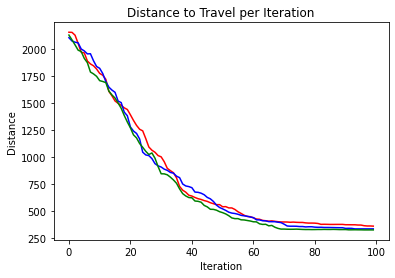

In [40]:
colors = ['red', 'blue', 'green']

for iiTrial in range(numTrials):

    plt.plot(trials[iiTrial]['distance'], color = colors[iiTrial], label = f"Trial {iiTrial:.1f}")
    
plt.title('Distance to Travel per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()
plt.show()

No handles with labels found to put in legend.


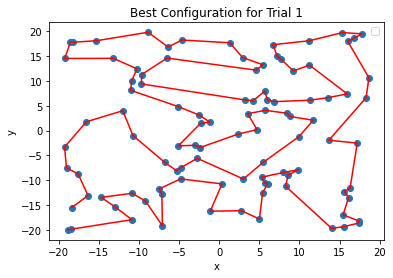

No handles with labels found to put in legend.


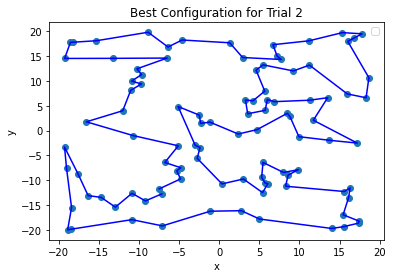

No handles with labels found to put in legend.


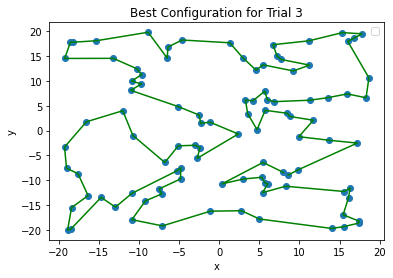

In [50]:
for iiTrial in range(numTrials):

    plt.scatter(x[:, 0], x[:, 1])
    tempCoords = trials[iiTrial]['configuration']
    plt.plot(tempCoords[:, 0], tempCoords[:, 1], color = colors[iiTrial])
    plt.title(f'Best Configuration for Trial {iiTrial + 1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()